# Прогноз оттока клиентов

## Описание проекта


Оператор связи «Ниединогоразрыва.ком» хочет научиться прогнозировать отток клиентов. Если выяснится, что пользователь планирует уйти, ему будут предложены промокоды и специальные условия. Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Описание услуг

Оператор предоставляет два основных типа услуг:
- Стационарную телефонную связь. Возможно подключение телефонного аппарата к нескольким линиям одновременно.
- Интернет. Подключение может быть двух типов: через телефонную линию (DSL, от англ. digital subscriber line, «цифровая абонентская линия») или оптоволоконный кабель (Fiber optic).

Также доступны такие услуги:
- Интернет-безопасность: антивирус (DeviceProtection) и блокировка небезопасных сайтов (OnlineSecurity);
- Выделенная линия технической поддержки (TechSupport);
- Облачное хранилище файлов для резервного копирования данных (OnlineBackup);
- Стриминговое телевидение (StreamingTV) и каталог фильмов (StreamingMovies).

За услуги клиенты могут платить каждый месяц или заключить договор на 1–2 года. Доступны различные способы расчёта и возможность получения электронного чека.
Описание данны

### Описание данных

Данные состоят из файлов, полученных из разных источников:
- contract_new.csv — информация о договоре;
- personal_new.csv — персональные данные клиента;
- internet_new.csv — информация об интернет-услугах;
- phone_new.csv — информация об услугах телефонии.

Во всех файлах столбец `customerID` содержит код клиента.
Информация о договорах актуальна на 1 февраля 2020.

### Описание признаков

Таблица **contract**

- customerID — ID абонента;
- BeginDate — дата начала действия договора;
- EndDate — дата окончания действия договора;
- Type — тип оплаты: раз в год-два или ежемесячно;
- PaperlessBilling — электронный расчётный лист;
- PaymentMethod — тип платежа;
- MonthlyCharges — расходы за месяц;
- TotalCharges — общие расходы абонента.


Таблица **personal**

- customerID — ID пользователя;
- gender — пол;
- SeniorCitizen — является ли абонент пенсионером;
- Partner — есть ли у абонента супруг или супруга;
- Dependents — есть ли у абонента дети.


Таблица **internet**

- customerID — ID пользователя;
- InternetService — тип подключения;
- OnlineSecurity — блокировка опасных сайтов;
- OnlineBackup — облачное хранилище файлов для резервного копирования данных;
- DeviceProtection — антивирус;
- TechSupport — выделенная линия технической поддержки;
- StreamingTV — стриминговое телевидение;
- StreamingMovies — каталог фильмов.


Таблица **phone**

- customerID — ID пользователя;
- MultipleLines — подключение телефона к нескольким линиям одновременно.

### План выполнения проекта

**Исследование и подготовка данных**

- осмотр данных
- вывод общей и статистической информации
- объединение таблиц
- поиск пропусков, дубликатов,аномалий, выбросов,проверка типов данных
- предъобработка
- краткий вывод

**Подготовка выборок**

- разделение датасета на выборки
- кодирование признаков
- краткий вывод

**Подбор моделей**

- обучение и сравние моделей
- Подбор лучших гиперпараметров для самой эффективной модели
- краткий вывод

**Тестирование**

- проверка на тестовой выборке
- краткий вывод

**Общий вывод**

- анализ лучшей модели
- исследование важности признаков лучшей модели


*План является предварительным и моджет меняться по мере реализации проекта

# Анализ данных

In [ ]:
pip install phik


     |████████████████████████████████| 679 kB 2.1 MB/s eta 0:00:01
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install category_encoders

     |████████████████████████████████| 81 kB 1.2 MB/s eta 0:00:011
Note: you may need to restart the kernel to use updated packages.


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV
from phik import phik_matrix
import category_encoders as ce
from sklearn.metrics import confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import roc_auc_score, accuracy_score, roc_curve
from sklearn.ensemble import RandomForestClassifier
from catboost import CatBoostClassifier
from lightgbm import LGBMClassifier
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import re


pd.set_option('display.max_columns', 30)
warnings.filterwarnings("ignore")

In [ ]:
contract = pd.read_csv('/datasets/contract_new.csv', index_col='customerID')
personal = pd.read_csv('/datasets/personal_new.csv', index_col='customerID')
internet = pd.read_csv('/datasets/internet_new.csv', index_col='customerID')
phone = pd.read_csv('/datasets/phone_new.csv', index_col='customerID')

datasets = [contract, personal, internet, phone]

In [ ]:
for i in datasets:
    print("\nОЩАЯ ИНФОРМАЦИЯ \n")
    print(i.info())



ОЩАЯ ИНФОРМАЦИЯ 

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
dtypes: float64(1), object(6)
memory usage: 440.2+ KB
None

ОЩАЯ ИНФОРМАЦИЯ 

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 4 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   gender         7043 non-null   object
 1   SeniorCitizen  7043 non-null   int64 
 2   Partner        7043 non-null   object
 3   Dependents     7043 non-null

In [ ]:
contract.head(10)

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
customerID,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5
9305-CDSKC,2019-03-01,No,Month-to-month,Yes,Electronic check,99.65,1150.96
1452-KIOVK,2018-04-01,No,Month-to-month,Yes,Credit card (automatic),89.10,2058.21
6713-OKOMC,2019-04-01,No,Month-to-month,No,Mailed check,29.75,300.48
7892-POOKP,2017-07-01,No,Month-to-month,Yes,Electronic check,104.80,3573.68


In [ ]:
personal.head(10)

,gender,SeniorCitizen,Partner,Dependents
customerID,,,,
7590-VHVEG,Female,0,Yes,No
5575-GNVDE,Male,0,No,No
3668-QPYBK,Male,0,No,No
7795-CFOCW,Male,0,No,No
9237-HQITU,Female,0,No,No
9305-CDSKC,Female,0,No,No
1452-KIOVK,Male,0,No,Yes
6713-OKOMC,Female,0,No,No
7892-POOKP,Female,0,Yes,No


In [ ]:
internet.head(10)

,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies
customerID,,,,,,,
7590-VHVEG,DSL,No,Yes,No,No,No,No
5575-GNVDE,DSL,Yes,No,Yes,No,No,No
3668-QPYBK,DSL,Yes,Yes,No,No,No,No
7795-CFOCW,DSL,Yes,No,Yes,Yes,No,No
9237-HQITU,Fiber optic,No,No,No,No,No,No
9305-CDSKC,Fiber optic,No,No,Yes,No,Yes,Yes
1452-KIOVK,Fiber optic,No,Yes,No,No,Yes,No
6713-OKOMC,DSL,Yes,No,No,No,No,No
7892-POOKP,Fiber optic,No,No,Yes,Yes,Yes,Yes


In [ ]:
phone.head(10)

,MultipleLines
customerID,
5575-GNVDE,No
3668-QPYBK,No
9237-HQITU,No
9305-CDSKC,Yes
1452-KIOVK,Yes
7892-POOKP,Yes
6388-TABGU,No
9763-GRSKD,No
7469-LKBCI,No


In [ ]:
for i in datasets:
    print("\nСТАТИСТИКА\n")
    print(i.describe())


СТАТИСТИКА

       MonthlyCharges
count     7043.000000
mean        64.761692
std         30.090047
min         18.250000
25%         35.500000
50%         70.350000
75%         89.850000
max        118.750000

СТАТИСТИКА

       SeniorCitizen
count    7043.000000
mean        0.162147
std         0.368612
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000

СТАТИСТИКА

       InternetService OnlineSecurity OnlineBackup DeviceProtection  \
count             5517           5517         5517             5517   
unique               2              2            2                2   
top        Fiber optic             No           No               No   
freq              3096           3498         3088             3095   

       TechSupport StreamingTV StreamingMovies  
count         5517        5517            5517  
unique           2           2               2  
top             No          No              No  
freq          3473    

Пропусков нет, но размеры таблиц разные, потому пропуски появятся после объединения таблиц.

Выбросов и аномалий не наблюдается( в столбце MonthlyCharges среднее и медианное несильно отличаются).

Нужно привести названия признаков к snake_case

Нужно привести столбцы с датами к нужному формату

Нужно привести столбец TotalCharges к нужному формату


In [ ]:
# Объединим таблицы

df = contract.join([personal,internet,phone],how='left')

In [ ]:
df.head()

,BeginDate,EndDate,Type,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,gender,SeniorCitizen,Partner,Dependents,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,MultipleLines
customerID,,,,,,,,,,,,,,,,,,,
7590-VHVEG,2020-01-01,No,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,NaN
5575-GNVDE,2017-04-01,No,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No
3668-QPYBK,2019-10-01,No,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No
7795-CFOCW,2016-05-01,No,One year,No,Bank transfer (automatic),42.30,1960.6,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,NaN
9237-HQITU,2019-09-01,No,Month-to-month,Yes,Electronic check,70.70,353.5,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   BeginDate         7043 non-null   object 
 1   EndDate           7043 non-null   object 
 2   Type              7043 non-null   object 
 3   PaperlessBilling  7043 non-null   object 
 4   PaymentMethod     7043 non-null   object 
 5   MonthlyCharges    7043 non-null   float64
 6   TotalCharges      7043 non-null   object 
 7   gender            7043 non-null   object 
 8   SeniorCitizen     7043 non-null   int64  
 9   Partner           7043 non-null   object 
 10  Dependents        7043 non-null   object 
 11  InternetService   5517 non-null   object 
 12  OnlineSecurity    5517 non-null   object 
 13  OnlineBackup      5517 non-null   object 
 14  DeviceProtection  5517 non-null   object 
 15  TechSupport       5517 non-null   object 
 16  StreamingTV       5517 non-null 

In [ ]:
# ПРиведем к snake_case

df.columns = [re.sub(r'(?<!^)(?=[A-Z])', '_', i).lower()for i in df.columns]
df.columns

Index(['begin_date', 'end_date', 'type', 'paperless_billing', 'payment_method',
       'monthly_charges', 'total_charges', 'gender', 'senior_citizen',
       'partner', 'dependents', 'internet_service', 'online_security',
       'online_backup', 'device_protection', 'tech_support', 'streaming_t_v',
       'streaming_movies', 'multiple_lines'],
      dtype='object')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7043 entries, 7590-VHVEG to 3186-AJIEK
Data columns (total 19 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   begin_date         7043 non-null   object 
 1   end_date           7043 non-null   object 
 2   type               7043 non-null   object 
 3   paperless_billing  7043 non-null   object 
 4   payment_method     7043 non-null   object 
 5   monthly_charges    7043 non-null   float64
 6   total_charges      7043 non-null   object 
 7   gender             7043 non-null   object 
 8   senior_citizen     7043 non-null   int64  
 9   partner            7043 non-null   object 
 10  dependents         7043 non-null   object 
 11  internet_service   5517 non-null   object 
 12  online_security    5517 non-null   object 
 13  online_backup      5517 non-null   object 
 14  device_protection  5517 non-null   object 
 15  tech_support       5517 non-null   object 
 16  streaming_t_v 

In [ ]:
# Удалим все строки total_chargesб в которых не числа

def is_num(value):
    try:
        float(value)
        return True
    except ValueError:
        return False

df = df[df['total_charges'].apply(is_num)]

Заменить их мы не можем - удаляем

In [ ]:
# Поменяем форматы тоблиц

df['total_charges'] = df['total_charges'].astype(float)
df['begin_date'] = pd.to_datetime(df['begin_date'])

Прежде чем поменять формат в столбце end_date, сформируем по нему целевой признак current_client, где 1 - действующий клиент, 0 - потерянный клиент

In [ ]:
# напишем функцию для создания целевого признака

def make_target(row):
    if row['end_date'] == 'No':
        return 1
    else:
        return 0

In [ ]:
# Создадим признак

df['curretn_client'] = df.apply(make_target, axis=1)

In [ ]:
# Поменяем значения No на текущую дату и поменяем формат

df.loc[df['end_date'] == 'No', 'end_date'] = '2020-02-01'
df['end_date'] = pd.to_datetime(df['end_date'])


Сами даты заключени я и расторжения договоров не имеется особого значения.
Вместо них создадим два признака:

- duration - продолжительность договора в днях
- begin_month - месяц подключения
- end_month - месяц расторжения

In [ ]:
df['duration'] = round((df['end_date'] - df['begin_date'])/np.timedelta64(1, 'D')).astype(int)

In [ ]:
# напишем функцию для создания признака с месяцем заключения договора

def begin_month(row):
    return pd.to_datetime(row['begin_date']).month

In [ ]:
df['begin_month'] = df.apply(begin_month, axis=1)

Теперь заполним пропуски.
Так как пропуски появились в столбцах с информацией о подключении тех или иных услуг, пропуск обозначает отсутствие этой услуги у клиента, потому поменяем пропуски на No

In [ ]:
df = df.fillna('No')

In [ ]:
# cбросим индексы, для удаления ID

df = df.reset_index()

In [ ]:
# Удалим ненужные столбцы

df = df.drop(columns=['end_date', 'begin_date','customerID'])

Выведем обновленную таблицу

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7032 entries, 0 to 7031
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   type               7032 non-null   object 
 1   paperless_billing  7032 non-null   object 
 2   payment_method     7032 non-null   object 
 3   monthly_charges    7032 non-null   float64
 4   total_charges      7032 non-null   float64
 5   gender             7032 non-null   object 
 6   senior_citizen     7032 non-null   int64  
 7   partner            7032 non-null   object 
 8   dependents         7032 non-null   object 
 9   internet_service   7032 non-null   object 
 10  online_security    7032 non-null   object 
 11  online_backup      7032 non-null   object 
 12  device_protection  7032 non-null   object 
 13  tech_support       7032 non-null   object 
 14  streaming_t_v      7032 non-null   object 
 15  streaming_movies   7032 non-null   object 
 16  multiple_lines     7032 

In [ ]:
df.head(15)

,type,paperless_billing,payment_method,monthly_charges,total_charges,gender,senior_citizen,partner,dependents,internet_service,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines,curretn_client,duration,begin_month
0,Month-to-month,Yes,Electronic check,29.85,31.04,Female,0,Yes,No,DSL,No,Yes,No,No,No,No,No,1,31,1
1,One year,No,Mailed check,56.95,2071.84,Male,0,No,No,DSL,Yes,No,Yes,No,No,No,No,1,1036,4
2,Month-to-month,Yes,Mailed check,53.85,226.17,Male,0,No,No,DSL,Yes,Yes,No,No,No,No,No,1,123,10
3,One year,No,Bank transfer (automatic),42.30,1960.60,Male,0,No,No,DSL,Yes,No,Yes,Yes,No,No,No,1,1371,5
4,Month-to-month,Yes,Electronic check,70.70,353.50,Female,0,No,No,Fiber optic,No,No,No,No,No,No,No,1,153,9
5,Month-to-month,Yes,Electronic check,99.65,1150.96,Female,0,No,No,Fiber optic,No,No,Yes,No,Yes,Yes,Yes,1,337,3
6,Month-to-month,Yes,Credit card (automatic),89.10,2058.21,Male,0,No,Yes,Fiber optic,No,Yes,No,No,Yes,No,Yes,1,671,4
7,Month-to-month,No,Mailed check,29.75,300.48,Female,0,No,No,DSL,Yes,No,No,No,No,No,No,1,306,4
8,Month-to-month,Yes,Electronic check,104.80,3573.68,Female,0,Yes,No,Fiber optic,No,No,Yes,Yes,Yes,Yes,Yes,1,945,7
9,One year,No,Bank transfer (automatic),56.15,1628.35,Male,0,No,Yes,DSL,Yes,Yes,No,No,No,No,No,0,882,12


Посмотрим на корреляцию признаков и их распределение

In [ ]:
corr_matrix = phik_matrix(df)

interval columns not set, guessing: ['monthly_charges', 'total_charges', 'senior_citizen', 'curretn_client', 'duration', 'begin_month']


In [ ]:
print(corr_matrix)

                       type  paperless_billing  payment_method  \
type               1.000000           0.106151        0.277528   
paperless_billing  0.106151           1.000000        0.368945   
payment_method     0.277528           0.368945        1.000000   
monthly_charges    0.388557           0.467547        0.398849   
total_charges      0.470700           0.202168        0.334563   
gender             0.000000           0.000000        0.000000   
senior_citizen     0.085800           0.241715        0.291989   
partner            0.179294           0.010489        0.244661   
dependents         0.146126           0.170650        0.222859   
internet_service   0.503776           0.231145        0.323013   
online_security    0.152239           0.000000        0.261704   
online_backup      0.099016           0.196937        0.282245   
device_protection  0.137817           0.161234        0.306678   
tech_support       0.180169           0.055354        0.270893   
streaming_

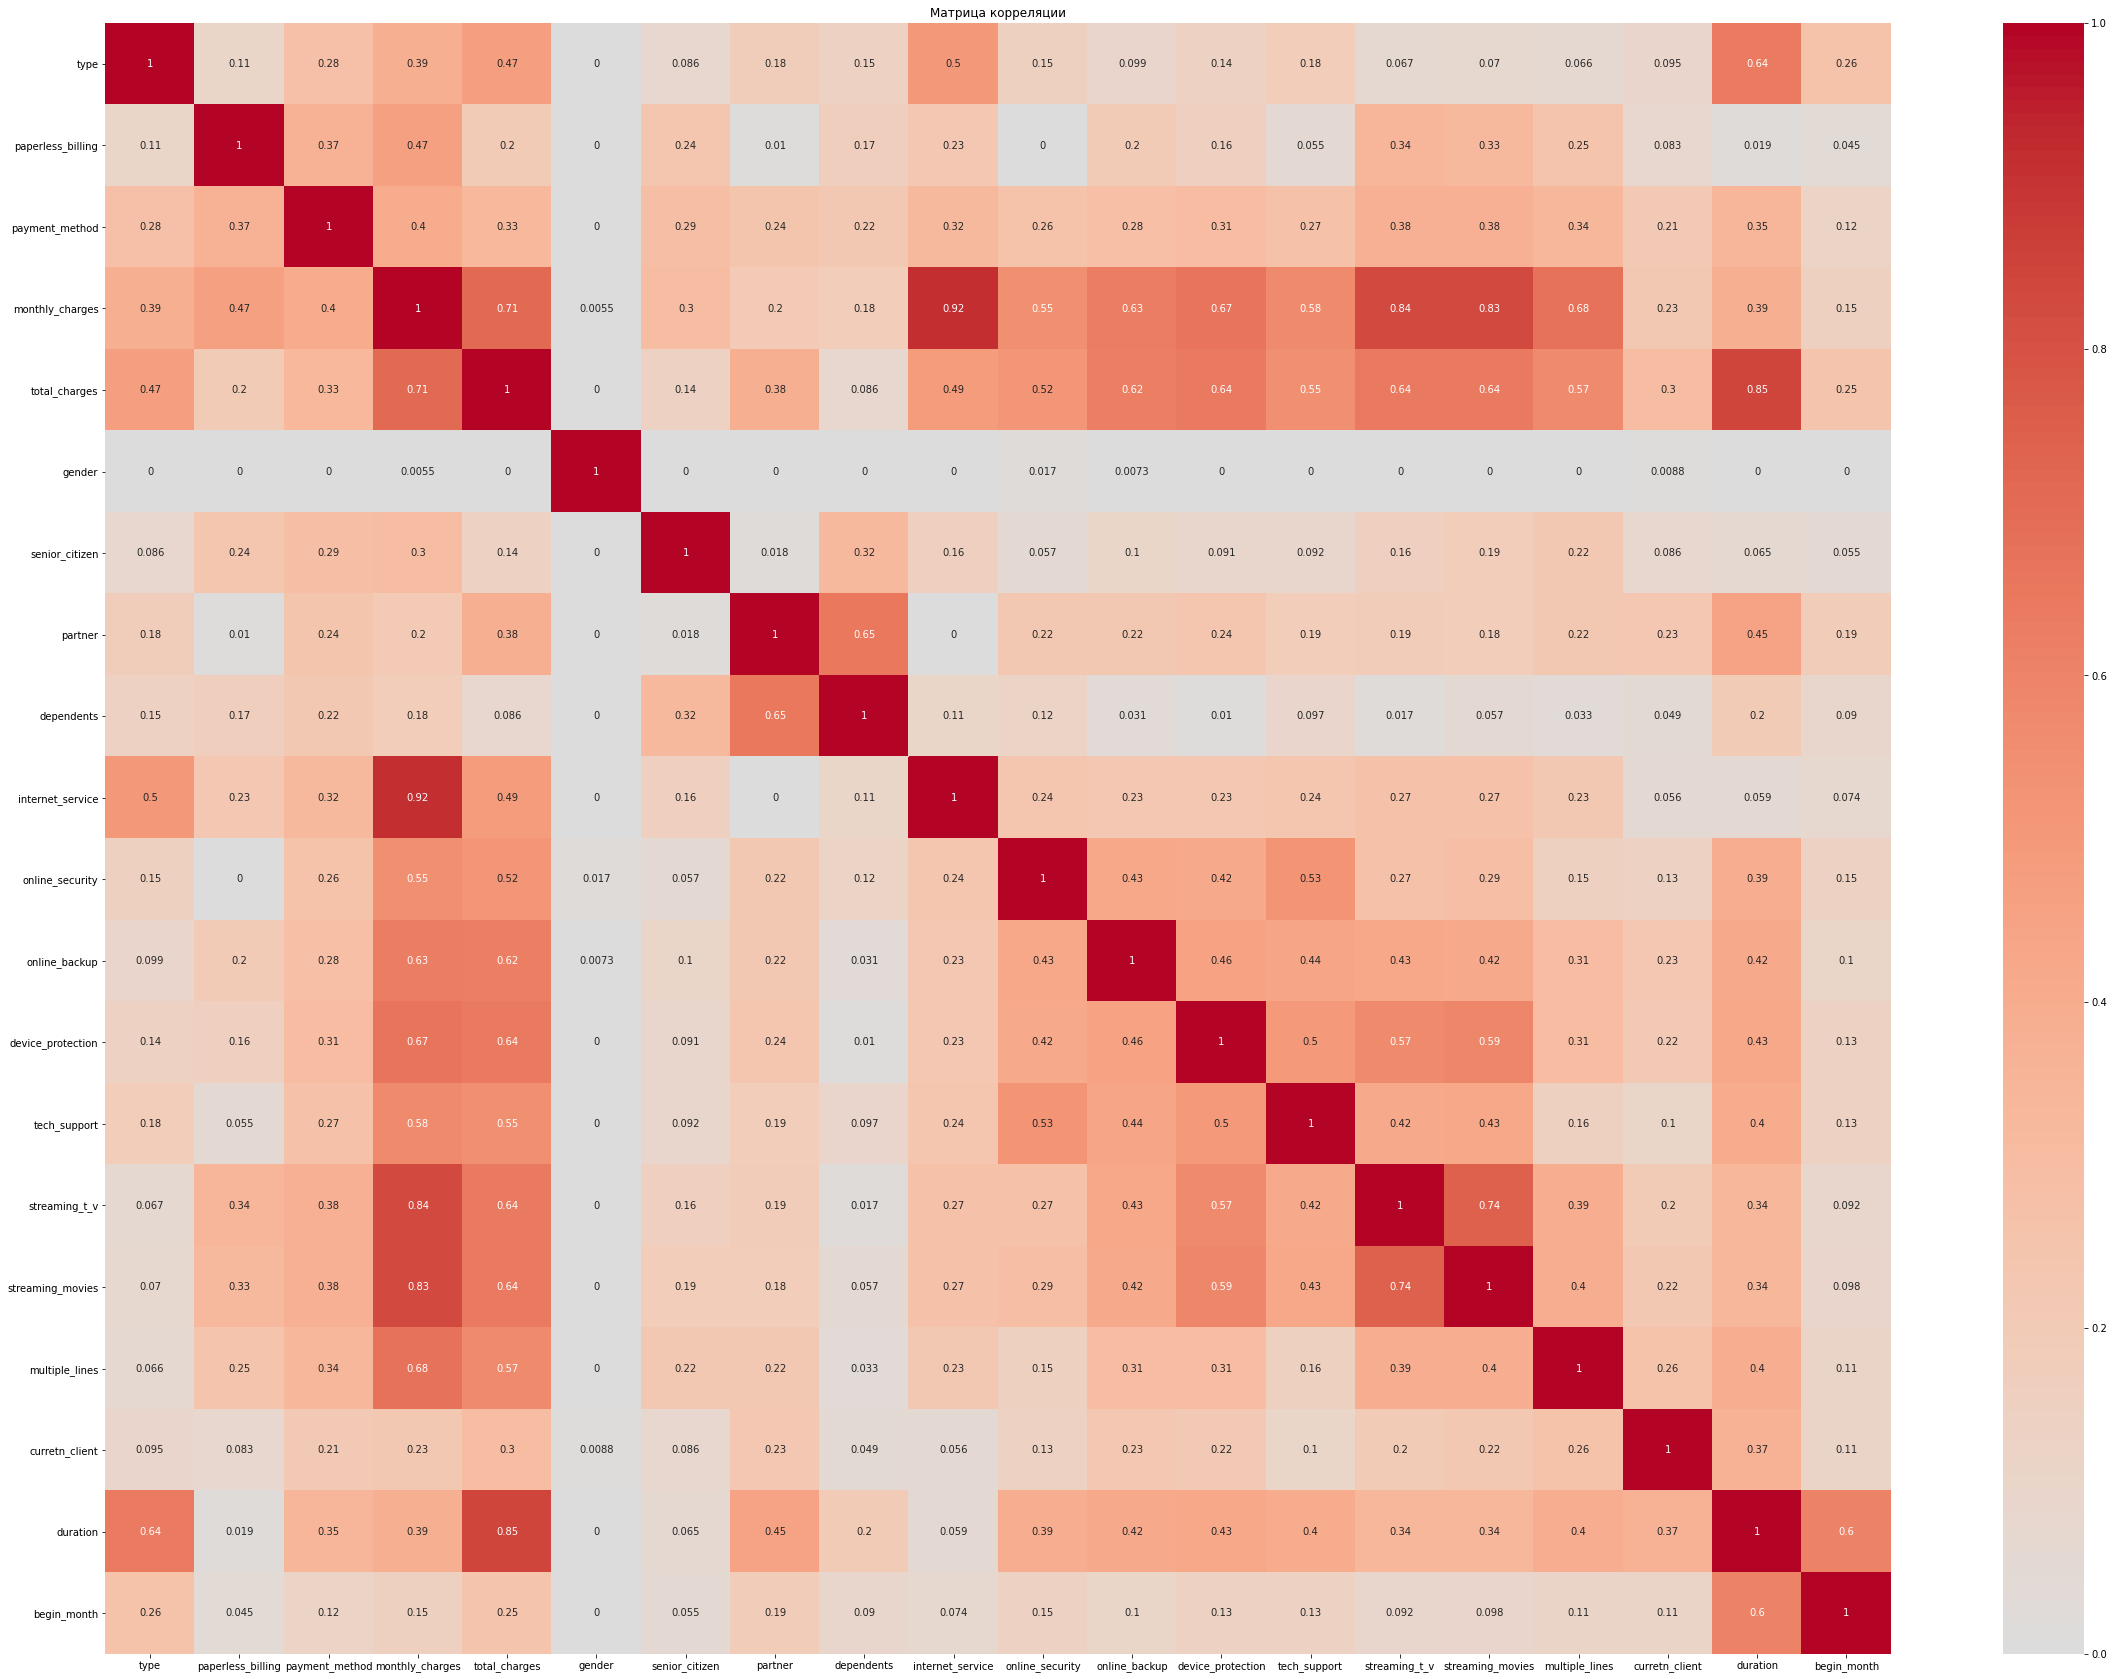

In [ ]:
plt.figure(figsize = (40,30))
sns.heatmap(corr_matrix,annot=True, cmap='coolwarm',center=0)
plt.title('Матрица корреляции')
plt.show()

Как видим, самая маленькая корреляция с целевым признаком у gender, dependents, internet_service, senior_citizen, paperless_billing.
Дабы не нагружать модели, удалим эти признаки

In [ ]:
new_df = df.drop(columns=['gender', 'dependents','internet_service','senior_citizen','paperless_billing','begin_month'])

In [ ]:
new_df.head(20)

,type,payment_method,monthly_charges,total_charges,partner,online_security,online_backup,device_protection,tech_support,streaming_t_v,streaming_movies,multiple_lines,curretn_client,duration
0,Month-to-month,Electronic check,29.85,31.04,Yes,No,Yes,No,No,No,No,No,1,31
1,One year,Mailed check,56.95,2071.84,No,Yes,No,Yes,No,No,No,No,1,1036
2,Month-to-month,Mailed check,53.85,226.17,No,Yes,Yes,No,No,No,No,No,1,123
3,One year,Bank transfer (automatic),42.30,1960.60,No,Yes,No,Yes,Yes,No,No,No,1,1371
4,Month-to-month,Electronic check,70.70,353.50,No,No,No,No,No,No,No,No,1,153
5,Month-to-month,Electronic check,99.65,1150.96,No,No,No,Yes,No,Yes,Yes,Yes,1,337
6,Month-to-month,Credit card (automatic),89.10,2058.21,No,No,Yes,No,No,Yes,No,Yes,1,671
7,Month-to-month,Mailed check,29.75,300.48,No,Yes,No,No,No,No,No,No,1,306
8,Month-to-month,Electronic check,104.80,3573.68,Yes,No,No,Yes,Yes,Yes,Yes,Yes,1,945
9,One year,Bank transfer (automatic),56.15,1628.35,No,Yes,Yes,No,No,No,No,No,0,882


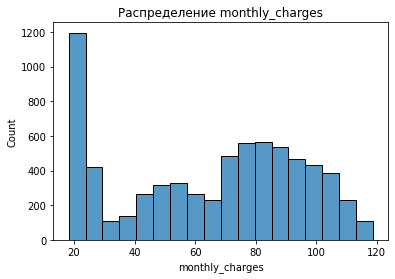

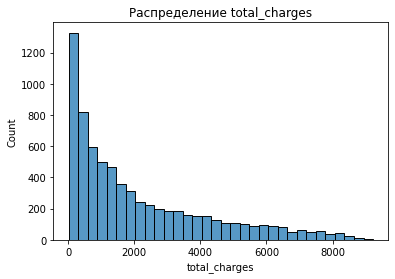

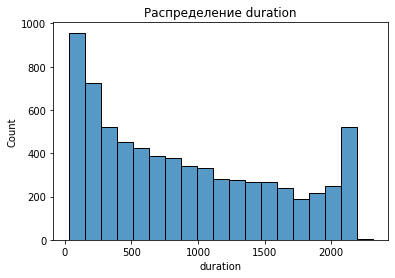

In [ ]:
# ПОсмотрим на распределение числовых признаков

numeric_features = ['monthly_charges','total_charges','duration']

for col in numeric_features:

    sns.histplot(data  = new_df, x = col)
    plt.title(f'Распределение {col}')
    plt.show()

### Вывод

В рамках анализа и предобработки данных были выполнены следующие шаги:

- загрузка данных
- просмотр информации по каждой из 4 страниц
- объединение таблиц
- корректировка названий столбцов
- удаление пропусков в total_charges и изменение типа данных на float64
- создание новых признаков:
        current_client - действующий ли клиент
        duration - длительность договора
        begin_month - месяц заключения договора
- заполнили пропуски
- проверили корреляцию признаков
- удалили самые незначимые признаки: gender, dependents, internet_service, senior_citizen, paperless_billing

Данные готовы к кодированию и разделению на выборки для дальнейшего обучения и тестирования моделей


## Подготовка выборок

### Разделение датасета на выборки

По условиям проекта, тестовая выборка должна составлять не более 25% от общего размера датасета.

Так же, т.к. общий размер небольшой, валидационную выборку выделять не будем, будем использовать кросс-валидацию.

Модели будем использовать нелинейные, потому достаточно только закодировать, с помощью Target_encoder


In [ ]:
# Разделим на выборки

train, test = train_test_split(new_df, shuffle=False, test_size=0.25, random_state = 140823)

In [ ]:
# выделим целевой признак



features_test = features_train = train.drop(['curretn_client'], axis=1)
target_train = train['curretn_client']test.drop(['curretn_client'], axis=1)
target_test = test['curretn_client']

### Кодирование признаков

In [ ]:
# закодируем категориальные признаки

cat_geatures = ['type','payment_method',
                'partner','online_security',
                'online_backup','device_protection',
                'tech_support','streaming_t_v',
                'streaming_movies','multiple_lines'] # список с категориальными признаками

encoder = ce.TargetEncoder(cols=cat_geatures,handle_unknown=0, smoothing=0)

features_train = encoder.fit_transform(features_train,target_train)
features_test = encoder.transform(features_test)


### вывод

Разделили датасет на тренировочную и тестовые выборки в соотношении 3/1.
После чего закодировали с помощью TargetENcoder
Данные готовы к использованию в моделях

## Подбор моделей

Будем использовать следующие модели: Случайный лес, CatBoost и LGBM

In [ ]:
# Для сравнения моделей создадим таблицу

models_scors = pd.DataFrame(columns = ['model', 'roc_auc'])


### Обучение и сравние моделей

#### Случайный лес

In [ ]:
%%time
rf_model = RandomForestClassifier(random_state=140823)

rf_parameters = [{'max_depth': list(range(1,10,2)),
                  'n_estimators': list(range(10,200,10))}]

rf_model_gscv = RandomizedSearchCV(rf_model, rf_parameters, scoring='roc_auc',
                   cv=5,random_state=140823)
rf_model_gscv.fit(features_train, target_train)

models_scors = models_scors.append({'model' : 'Случайный лес',
                     'roc_auc' : rf_model_gscv.best_score_}, ignore_index=True)

print(rf_model_gscv.best_params_)
print(rf_model_gscv.best_score_)

{'n_estimators': 160, 'max_depth': 7}
0.8359043098381272
CPU times: user 17.9 s, sys: 83.1 ms, total: 18 s
Wall time: 18.1 s


#### CatBoost

In [ ]:
%%time
cat_model = CatBoostClassifier(random_state=140823)

cat_parameters = [{'iterations': list(range(10,200,10)),
                  'learning_rate': [0.01,0.1,0.2],
                  'depth':list(range(1,10,1))}]

cat_model_gscv = RandomizedSearchCV(cat_model, rf_parameters, scoring='roc_auc',
                   cv=5,random_state=140823)
cat_model_gscv.fit(features_train, target_train)

models_scors = models_scors.append({'model' : 'CatBoost',
                     'roc_auc' : cat_model_gscv.best_score_}, ignore_index=True)
print(cat_model_gscv.best_params_)
print(cat_model_gscv.best_score_)

Learning rate set to 0.297128
0:	learn: 0.5676099	total: 12.2ms	remaining: 599ms
1:	learn: 0.4909530	total: 21.1ms	remaining: 507ms
2:	learn: 0.4363318	total: 24ms	remaining: 376ms
3:	learn: 0.3983664	total: 32.4ms	remaining: 372ms
4:	learn: 0.3747174	total: 40.7ms	remaining: 366ms
5:	learn: 0.3580679	total: 48.8ms	remaining: 358ms
6:	learn: 0.3436786	total: 57.2ms	remaining: 352ms
7:	learn: 0.3320078	total: 67.4ms	remaining: 354ms
8:	learn: 0.3234280	total: 76.4ms	remaining: 348ms
9:	learn: 0.3172893	total: 84.6ms	remaining: 338ms
10:	learn: 0.3121912	total: 94.1ms	remaining: 334ms
11:	learn: 0.3063274	total: 102ms	remaining: 324ms
12:	learn: 0.3007391	total: 110ms	remaining: 314ms
13:	learn: 0.2971699	total: 118ms	remaining: 304ms
14:	learn: 0.2940891	total: 126ms	remaining: 294ms
15:	learn: 0.2900472	total: 134ms	remaining: 285ms
16:	learn: 0.2868219	total: 144ms	remaining: 279ms
17:	learn: 0.2836365	total: 154ms	remaining: 274ms
18:	learn: 0.2821694	total: 165ms	remaining: 269ms
19

#### LGBM

In [ ]:
%%time
lgbm_model = LGBMClassifier(random_state=140823)

lgbm_parameters = [{'n_estimators': list(range(10,200,10)),
                  'learning_rate': [0.01,0.1,0.2],
                  'max_depth':list(range(1,10,1))}]

lgbm_model_gscv = RandomizedSearchCV(lgbm_model, rf_parameters, scoring='roc_auc',
                   cv=5,random_state=140823,verbose = 10)
lgbm_model_gscv.fit(features_train, target_train)

models_scors = models_scors.append({'model' : 'LGBM',
                     'roc_auc' : lgbm_model_gscv.best_score_}, ignore_index=True)
print(lgbm_model_gscv.best_params_)
print(lgbm_model_gscv.best_score_)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
[CV 1/5; 1/10] START max_depth=9, n_estimators=50...............................
[CV 1/5; 1/10] END .............max_depth=9, n_estimators=50; total time= 1.6min
[CV 2/5; 1/10] START max_depth=9, n_estimators=50...............................
[CV 2/5; 1/10] END .............max_depth=9, n_estimators=50; total time= 2.1min
[CV 3/5; 1/10] START max_depth=9, n_estimators=50...............................
[CV 3/5; 1/10] END .............max_depth=9, n_estimators=50; total time= 2.1min
[CV 4/5; 1/10] START max_depth=9, n_estimators=50...............................
[CV 4/5; 1/10] END .............max_depth=9, n_estimators=50; total time= 1.6min
[CV 5/5; 1/10] START max_depth=9, n_estimators=50...............................
[CV 5/5; 1/10] END .............max_depth=9, n_estimators=50; total time=   3.8s
[CV 1/5; 2/10] START max_depth=3, n_estimators=150..............................
[CV 1/5; 2/10] END ............max_depth=3, n_es

In [ ]:
print(models_scors)



           model   roc_auc
0  Случайный лес  0.835904
1       CatBoost  0.850350
2       CatBoost  0.850350
3           LGBM  0.881936


Лучше всего показала себя LGBM мо следующими параметрами: 'n_estimators': 180, 'max_depth': 9
Ее и будем тестировать

#### Тест

In [ ]:
lgbm_model  = lgbm_model_gscv.best_estimator_

lgbm_pred_proba = lgbm_model.predict_proba(features_test)[:,1]
lgbm_predict = lgbm_model.predict(features_test)

auc_roc = roc_auc_score(target_test,lgbm_pred_proba)
acc = accuracy_score(target_test,lgbm_predict)

print('Accuracy на тестовой модели:', acc)
print('AUC_ROC на тестовой выборке: ', auc_roc )

Accuracy на тестовой модели: 0.9015927189988624
AUC_ROC на тестовой выборке:  0.8945184797438936


In [ ]:
confusion_matrix = confusion_matrix(target_test, lgbm_predict)

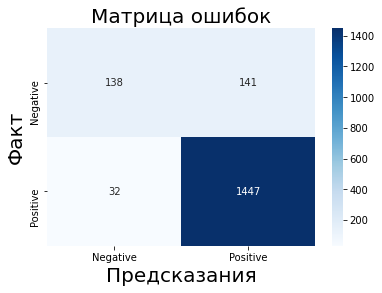

In [ ]:
labels = ['Negative', 'Positive']
sns.heatmap(confusion_matrix, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
plt.xlabel("Предсказания",fontsize = 20)
plt.ylabel("Факт",fontsize = 20)
plt.title("Матрица ошибок",fontsize = 20)
plt.show()

#### Исследование важности признаков лучшей модели

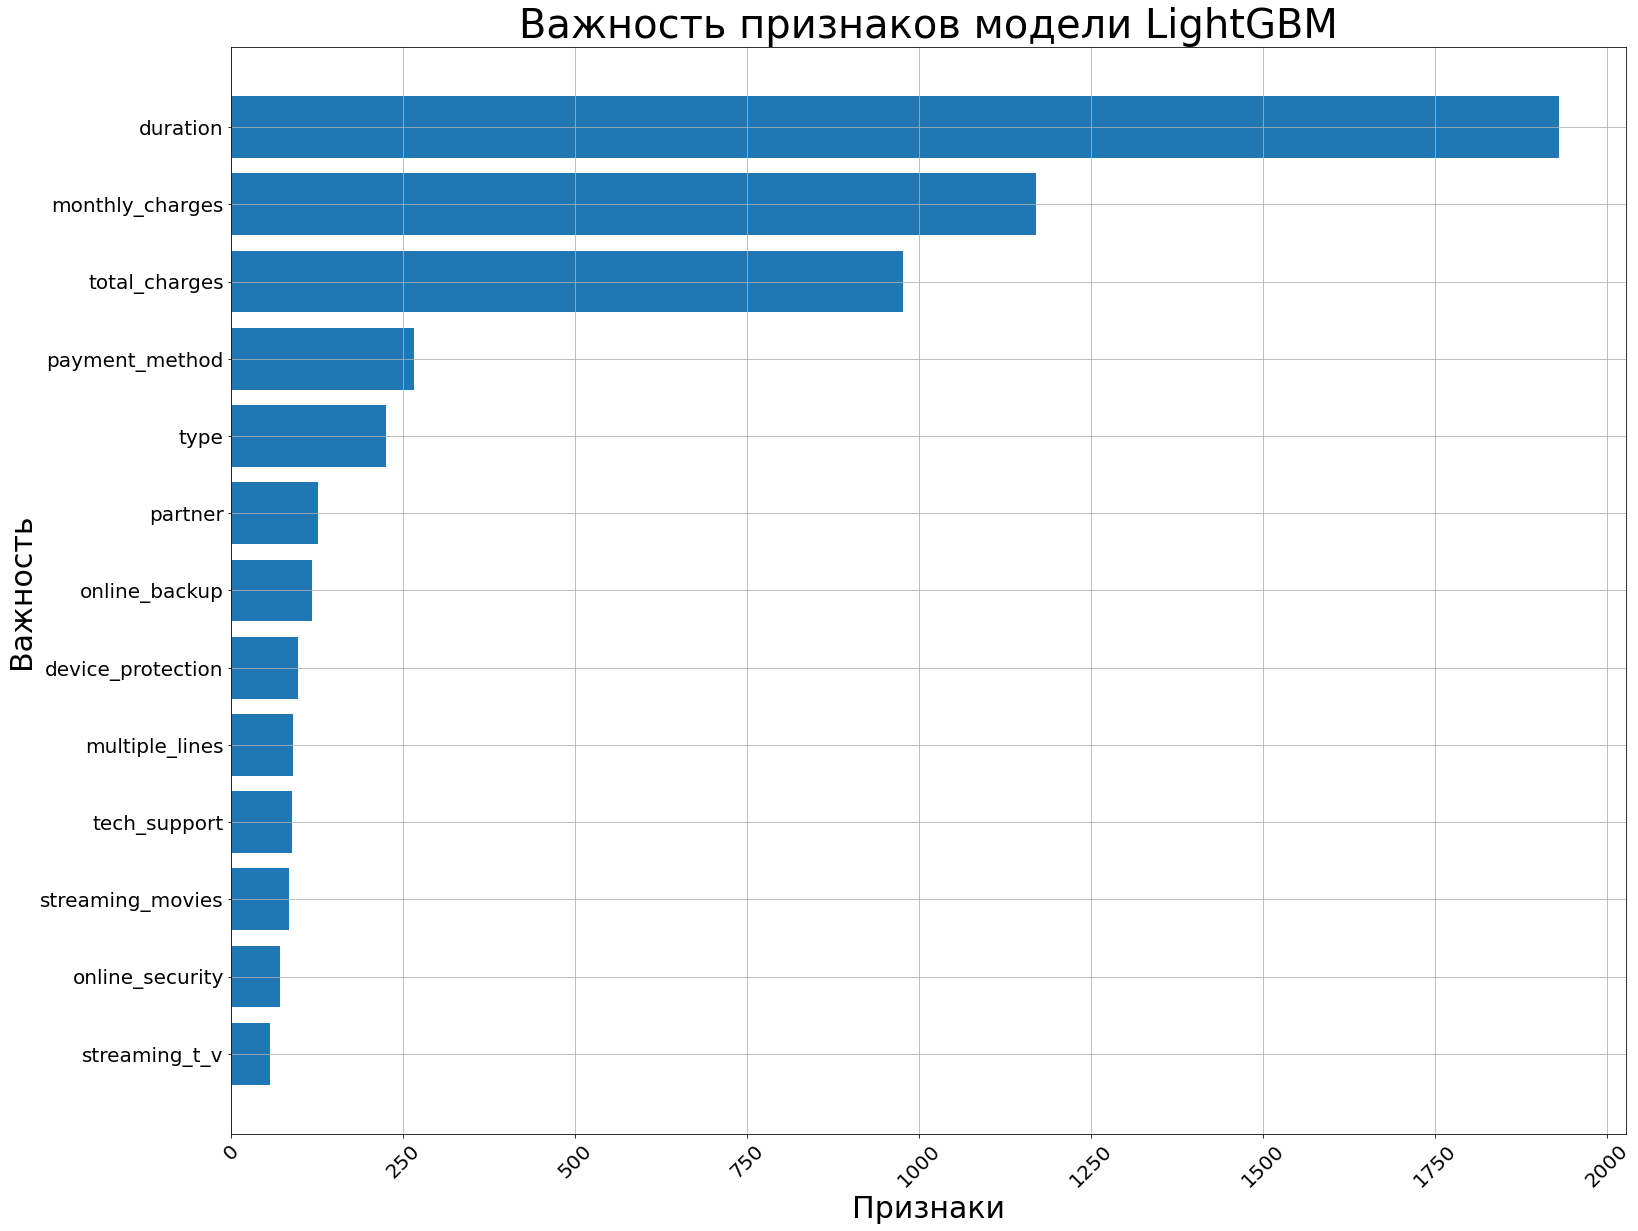

In [ ]:

feature_importances = lgbm_model.feature_importances_


importance_df = pd.DataFrame({'Признак': features_train.columns, 'Важность': feature_importances})


importance_df = importance_df.sort_values(by='Важность', ascending=True)
plt.figure(figsize=(25,20))
plt.barh(importance_df['Признак'], importance_df['Важность'])
plt.grid(True)
plt.title('Важность признаков модели LightGBM',fontsize =40)
plt.ylabel('Важность',fontsize =30)
plt.xlabel('Признаки',fontsize =30)
plt.xticks(rotation=45, fontsize =20)
plt.yticks(fontsize =20)
plt.show()

#### Вывод

В этом разделе мы сделали следующие шаги:

- разделили на тестовую и тренировочную выборки в соотношении 3/1
- выделили целевые признаки обеих выборок
- закодировали категориальные признаки с помощью Target_encoder
- обучили три модели:Случайный лес, CatBoostClassifier и LGBMClassifier, для подбора гиперпараметров использовали RandomizedSearchCV

Лучше всех себя показала модель LGBMClassifier с результатом на трейне:0.8819360198618442.

На тесте она дала результат:
- AUC_ROC - 0.8945184797438936 - необходимый порог в 0.85 преодолен
- Accuracy - 0.9015927189988624

Матрица ошибок показывает, что модель:

- 1447 раз из 1480 правильно предсказала положительный класс
- 138 раз из 279 правильно предсказала отрицательный класс

Что касается важности признаков лучшей модели: как и ожидалось, самыми важными оказались Продолжительность договора, месячные и годовые траты



## Отчет

Данный проект был выполнен по задаче оператов связи «Ниединогоразрыва.ком, который хочет научиться прогнозировать отток клиентов.

**Цель**: предложение промокодов и специальных условий для удержания тех клиентов, уход которых был предсказан.

Команда оператора собрала персональные данные о некоторых клиентах, информацию об их тарифах и договорах.

### Проект выполнялся согласно следующему плану:


**Исследование и подготовка данных**

- **осмотр данных**:
    
        Были загружены данные из 4 таблиц:
    
                `contract_new.csv`,
                `personal_new.csv`,
                `internet_new.csv`,
                `phone_new.csv`
                
    
- **вывод общей и статистической информации**
    
        С помощью средств библиотеки Pandas вывели общую информацию по каждой таблице,
        Провели визуальный осмотр самих таблиц,
        Просмотрели статистику по каждой таблиц.


- **объединение таблиц**
    
        Объединили все таблицы в один датасет под название `df`, соединив данные по общему для всех таблиц
        стобцу `customerID`
        
- **поиск пропусков, дубликатов,аномалий, выбросов,проверка типов данных**
        
        Привели названия столбцов к snake_cse
        Удалили пропуски в total_charges и изменили тип данных на float64
        Создали новых признаков:
        
                `current_client` - действующий ли клиент
                `duration` - длительность договора
                
                
        Заполнили пропуски в остальных столбцах, заменив на `No`
        Проверили корреляцию признаков, выгрузив таблицу и матрицу коррелций
        Удалили самые незначимые признаки:
                'end_date',
                'begin_date',
                'customerID',
                `gender`,
                `dependents`,
                `internet_service`,
                `senior_citizen`,
                `paperless_billing`

- **разделение датасета на выборки**
        
        Разделили датасет на выборки `train` и `test` в соотношении 3/1
        Выделили из выборок признаки:
        
                `features_train` и `target_train`
                `features_test` и `target_test`
              
- **кодирование признаков**
        
        Используя средства category_encoders, закодировали категориальные признаки для дальнейшего
        использования их в моделях
        

**Подбор моделей**

- **обучение и сравние моделей**

        В проекте использовали следующие модели: Случайный лес, CatBoost и LGBM
        Средствами RandomizedSearchCV с помощью крос-валидации обучали  модель, выбирая лучшие гиперпараметры
        для каждой
        
- **Подбор лучших гиперпараметров для самой эффективной модели**

        На основании результатов предыдущего пункта была выбрана лучшая модель и лучшие гиперпараметры к ней

.
**Тестирование**

- **проверка на тестовой выборке**

        Обученную  модель проверяли на тестовой выборке
        

**Общий вывод**

- **анализ лучшей модели и исследование важности признаков лучшей модели**

        Провели анализ полученных результатов, вывели графики
        
       

**Изначально предложенный план действий был выполнен по каждому пункту.**

**Сложностей с исследованием и предобработкой данных не было,т.к. данные были в более чем удовлетворяющем состоянии**

**Из за чего не было проблем в их подготовке к работе с моделями, и в самой работе тоже.**



**Из выше указанных шагов, выделить какие-то шига как ключевые невозмодно, т.к. каждый из них был необходим для выполнения проекта**


### Модели

В рамках проекта лучше всех себя показала модель LGBMClassifier с результатом на трейне:0.8819360198618442.
лучшими гиперпараметрами являются:

- `n_estimators` - Кол-во деревьев -  180
- `max_depth` - глубина дерева -  9

На тесте она дала результат:

- AUC_ROC - 0.8945184797438936 - необходимый порог в 0.85 преодолен
- Accuracy - 0.9015927189988624

Матрица ошибок показывает, что модель:

- 1447 раз из 1480 правильно предсказала положительный класс
- 138 раз из 279 правильно предсказала отрицательный класс

Что касается важности признаков лучшей модели: как и ожидалось, самыми важными оказались:

- `duration` -Продолжительность договора
- `monthly_charges` — расходы за месяц;
- `total_charges` — общие расходы абонента.


### Признаки

 В коннечном датасете `new_df` были использованы следующие признаки:

- `type` - тип оплаты: раз в год-два или ежемесячно
- `payment_method` - тип платежа
- `monthly_charges` - расходы за месяц
- `total_charges` - общие расходы абонента
- `partner` - есть ли у абонента супруг или супруга
- `online_security` - блокировка опасных сайтов
- `online_backup` - облачное хранилище файлов для резервного копирования данных
- `device_protection`  - антивирус
- `tech_support` - выделенная линия технической поддержки
- `streaming_t_v` - стриминговое телевидение
- `streaming_movies` -каталог фильмов
- `multiple_lines` - подключение телефона к нескольким линиям одновременно
- `current_client` - действующий ли клиент
- `duration` - длительность договора

Выше описана предобработка данных, потому повторно писать о обработке каждого признака нет необходимости


### Итог

**С поставленной задачей мы справились: лучшая модель подобрана, предсказания отвечают требованиям заказкива по качеству - AUC_ROC на тесте - 0.8945184797438936 .**
    

**РЕКОМЕНДАЦИЯ:** помимо предсказывания самого факта ухода клиента, можно было бы так же обучить модель для предсказания времени ухода клиента, дабы предлагаемые бонусы и спецпредложения были актуальны клиенту: сегодня для него эти бонусы вызовут просто "ну спасибо", а через полгода, за месяц до ухода, они вызовут "вот этого и не хватало!"